# Data Diri

*   Nama : Duwi Purnama Sidik
*   Email : duwi763@gmail.com
*   Alamat Domisili : Kota Malang, Jawa Timur






# Import Library

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Persiapan Data

## Upload Data

In [ ]:
uploaded = files.upload()

Saving Aspect Based Sentiment Analysis.csv to Aspect Based Sentiment Analysis.csv


In [ ]:
df = pd.read_csv('Aspect Based Sentiment Analysis.csv', encoding='unicode_escape')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
10683,LONDON MarketWatch -- Share prices ended lower...,negative
10684,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
10685,Operating profit fell to EUR 35.4 mn from EUR ...,negative
10686,Net sales of the Paper segment decreased to EU...,negative


In [ ]:
df = df.rename(columns={'Sentence': 'Comment', 'Sentiment': 'Sentiments'})
df

,Comment,Sentiments
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
10683,LONDON MarketWatch -- Share prices ended lower...,negative
10684,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
10685,Operating profit fell to EUR 35.4 mn from EUR ...,negative
10686,Net sales of the Paper segment decreased to EU...,negative


In [ ]:
print(df['Sentiments'].unique())

['positive' 'negative' 'neutral']


In [ ]:
df.isnull().sum()

Comment       0
Sentiments    0
dtype: int64

In [ ]:
df.shape

(10688, 2)

# Visualisasi Data

Text(30.764506172839504, 0.5, 'Jumlah')

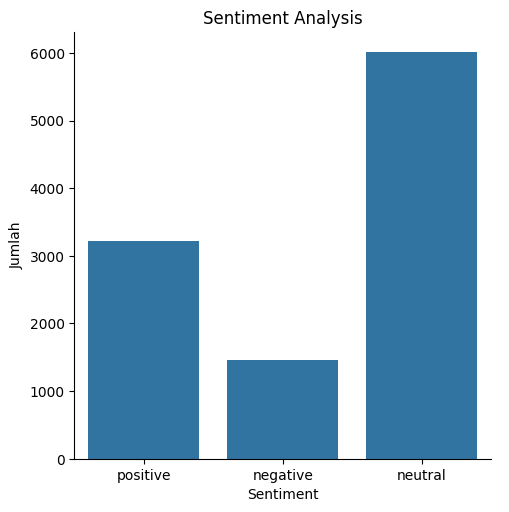

In [ ]:
count = df['Sentiments'].value_counts()
sns.catplot(x='Sentiments',kind="count", data=df)
plt.tight_layout()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')

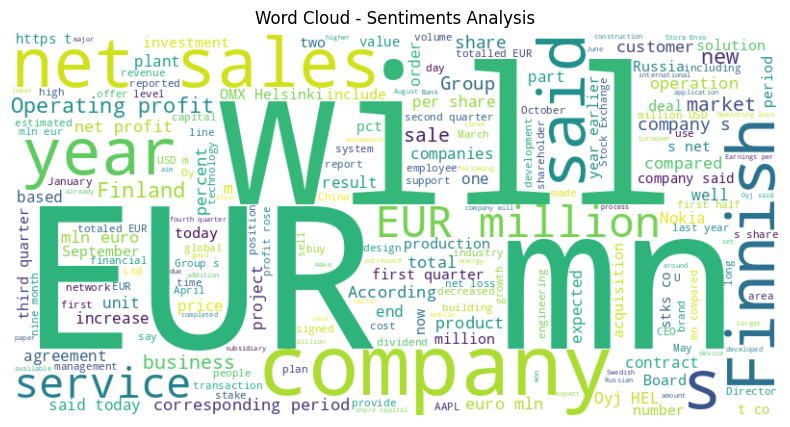

In [ ]:
# Menggabungkan semua tweet dalam satu teks
all_text = ' '.join(df['Comment'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiments Analysis')
plt.show()

# Preprocessing Data

## Lowercase


In [ ]:
df['Comment'] = df['Comment'].str.lower()
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


## Removing Special Characters

In [ ]:
def remove_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\t'," ").replace('\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
df['Comment'] = df['Comment'].apply(remove_text_special)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)
df['Comment'] = df['Comment'].apply(remove_number)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $. to $. bk a real possibility",negative
2,"for the last quarter of , componenta 's net s...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df['Comment'] = df['Comment'].apply(remove_punctuation)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()
df['Comment'] = df['Comment'].apply(remove_whitespace_LT)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
df['Comment'] = df['Comment'].apply(remove_whitespace_multiple)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sales...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
df['Comment'] = df['Comment'].apply(remove_singl_char)
df.head()

,Comment,Sentiments
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk real possibility,negative
2,for the last quarter of componenta net sales ...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


## Stopword Removal

In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)
df['Comment'] = df['Comment'].apply(word_tokenize_wrapper)
df.head()

,Comment,Sentiments
0,"[the, geosolutions, technology, will, leverage...",positive
1,"[esi, on, lows, down, to, bk, real, possibility]",negative
2,"[for, the, last, quarter, of, componenta, net,...",positive
3,"[according, to, the, finnishrussian, chamber, ...",neutral
4,"[the, swedish, buyout, firm, has, sold, its, r...",neutral


In [ ]:
stopwords_lst = stopwords.words('english')
stopwords_lst = set(stopwords_lst)

def stopwords_removal(words):
    return [word for word in words if word not in stopwords_lst]

df['Comment'] = df['Comment'].apply(stopwords_removal)
df.head()

,Comment,Sentiments
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, lows, bk, real, possibility]",negative
2,"[last, quarter, componenta, net, sales, double...",positive
3,"[according, finnishrussian, chamber, commerce,...",neutral
4,"[swedish, buyout, firm, sold, remaining, perce...",neutral


## Stemming

In [ ]:
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
df['Comment'] = df['Comment'].apply(stem_text)
df.head()

,Comment,Sentiments
0,geosolut technolog leverag benefon gp solut pr...,positive
1,esi low bk real possibl,negative
2,last quarter componenta net sale doubl eurm eu...,positive
3,accord finnishrussian chamber commerc major co...,neutral
4,swedish buyout firm sold remain percent stake ...,neutral


In [ ]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

In [ ]:
df.isnull().sum()

Comment       2
Sentiments    0
dtype: int64

In [ ]:
df = df.dropna()
df

,Comment,Sentiments
0,geosolut technolog leverag benefon gp solut pr...,positive
1,esi low bk real possibl,negative
2,last quarter componenta net sale doubl eurm eu...,positive
3,accord finnishrussian chamber commerc major co...,neutral
4,swedish buyout firm sold remain percent stake ...,neutral
...,...,...
10683,london marketwatch share price end lower londo...,negative
10684,rinkuskiai beer sale fell per cent million lit...,neutral
10685,oper profit fell eur mn eur mn includ vessel s...,negative
10686,net sale paper segment decreas eur mn second q...,negative


## Visualisasi Data Setelah Prepocesing data

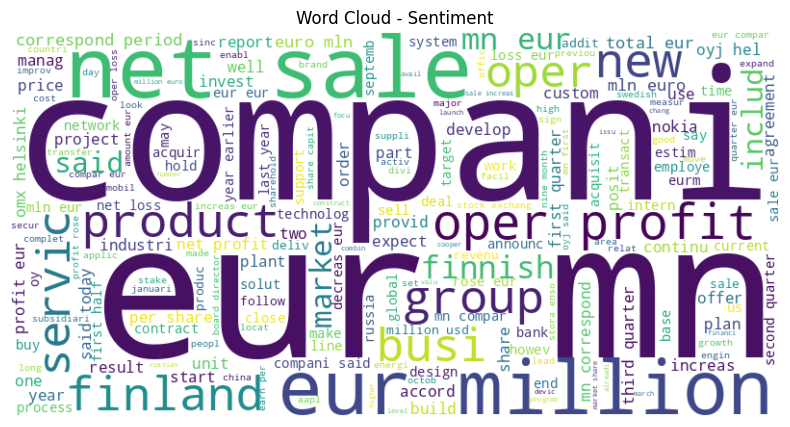

In [ ]:
# Menggabungkan semua tweet dalam satu teks
all_text = ' '.join(df['Comment'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiment')
plt.show()

# Modelling

## Split Data

In [ ]:
sentiments = pd.get_dummies(df.Sentiments)
df_new = pd.concat([df, sentiments], axis=1)
df_new = df_new.drop(columns='Sentiments')
df_new.head()

,Comment,negative,neutral,positive
0,geosolut technolog leverag benefon gp solut pr...,0,0,1
1,esi low bk real possibl,1,0,0
2,last quarter componenta net sale doubl eurm eu...,0,0,1
3,accord finnishrussian chamber commerc major co...,0,1,0
4,swedish buyout firm sold remain percent stake ...,0,1,0


In [ ]:
text = df_new['Comment'].values
category = df_new[['negative', 'neutral' , 'positive']].values
text_train, text_test, category_train, category_test = train_test_split(text, category, test_size=0.20, random_state=42)

## Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

## Model LSTM

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    tf.keras.layers.LSTM(128, dropout=0.5, recurrent_dropout=0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.optimizers.AdamW(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               82432     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
class forCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\n Great! The accuracy from training and validation set is already reach > 95%.")

Callback = forCallback()

# Training

In [ ]:
history = model.fit( padded_train, category_train, validation_data = (padded_test, category_test), epochs = 50, batch_size=64, verbose = 1, callbacks=[Callback])

Epoch 1/50
134/134 [==============================] - 21s 123ms/step - loss: 3.4780 - accuracy: 0.4991 - val_loss: 3.2336 - val_accuracy: 0.5617
Epoch 2/50
134/134 [==============================] - 16s 120ms/step - loss: 2.9008 - accuracy: 0.5581 - val_loss: 2.7440 - val_accuracy: 0.5617
Epoch 3/50
134/134 [==============================] - 17s 128ms/step - loss: 2.4503 - accuracy: 0.5810 - val_loss: 2.3140 - val_accuracy: 0.5702
Epoch 4/50
134/134 [==============================] - 16s 121ms/step - loss: 2.0696 - accuracy: 0.6179 - val_loss: 1.9448 - val_accuracy: 0.6080
Epoch 5/50
134/134 [==============================] - 16s 121ms/step - loss: 1.7501 - accuracy: 0.6511 - val_loss: 1.6569 - val_accuracy: 0.6749
Epoch 6/50
134/134 [==============================] - 17s 126ms/step - loss: 1.4913 - accuracy: 0.6779 - val_loss: 1.3988 - val_accuracy: 0.6899
Epoch 7/50
134/134 [==============================] - 17s 123ms/step - loss: 1.2755 - accuracy: 0.7068 - val_loss: 1.2051 - val_ac

# Visualisasi Evaluasi

Text(0.5, 1.0, 'Train and Validation Accuracy Graphs')

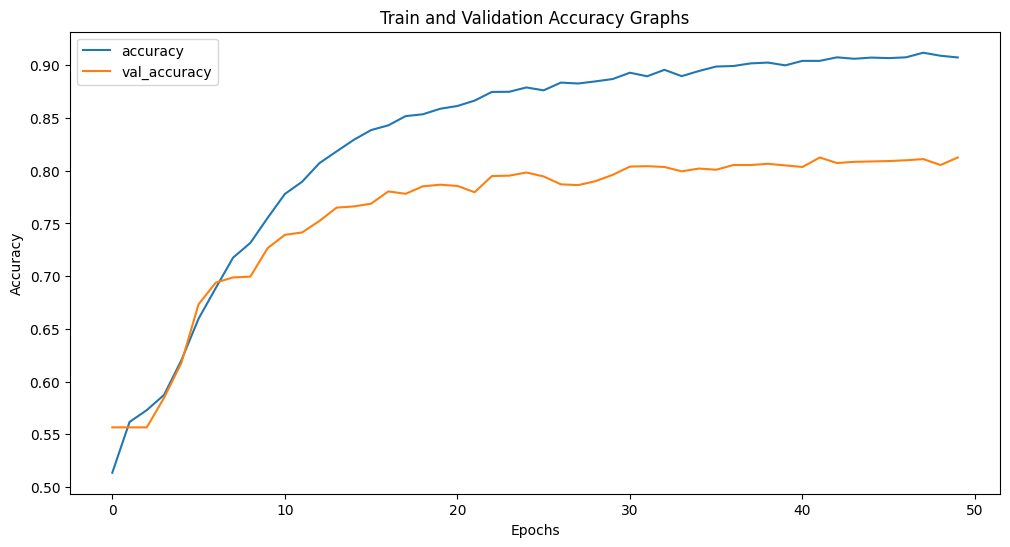

In [ ]:
#plot accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Train and Validation Accuracy Graphs')

Text(0.5, 1.0, 'Train and Validation Loss Graphs')

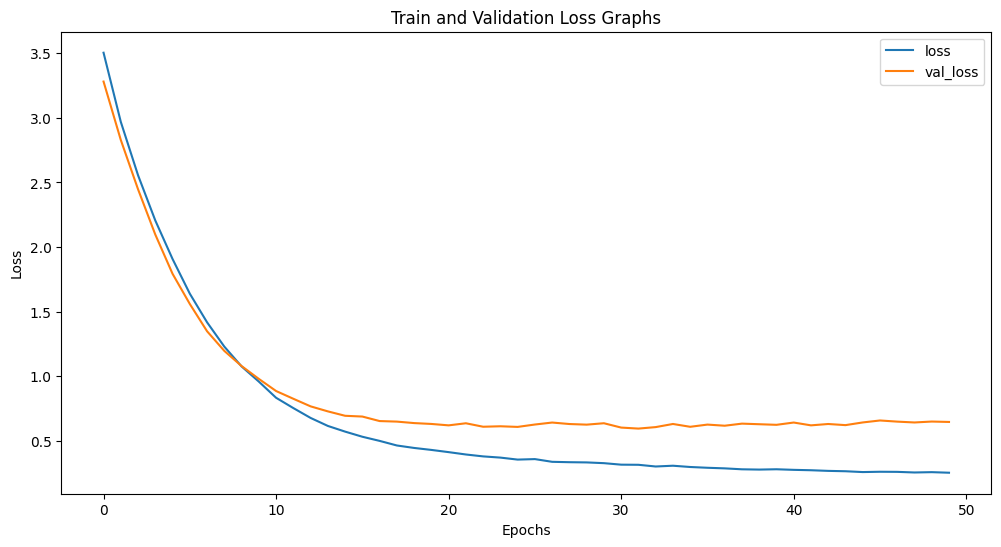

In [ ]:
#plot loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.title('Train and Validation Loss Graphs')